In [1]:
#allow for autoreload of packages
%load_ext autoreload
%autoreload 2

In [2]:
from iqm.qiskit_iqm import IQMProvider, IQMFakeAdonis
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

import numpy as np
import os

# package imports
import grover_circuit_generator_2q as circ_gen
import utils as utils

In [3]:
# Set the backend
backend_id = 'none'

if backend_id == 'Helmi':
    HELMI_CORTEX_URL = os.getenv('HELMI_CORTEX_URL')
    provider = IQMProvider(HELMI_CORTEX_URL)
    backend = provider.get_backend()


# Fake Helmi backend
backend_fake = IQMFakeAdonis()

# Ideal backend
ideal_simulator =  AerSimulator()

In [4]:
# Set up parameters
shots = 10000

# Version 1

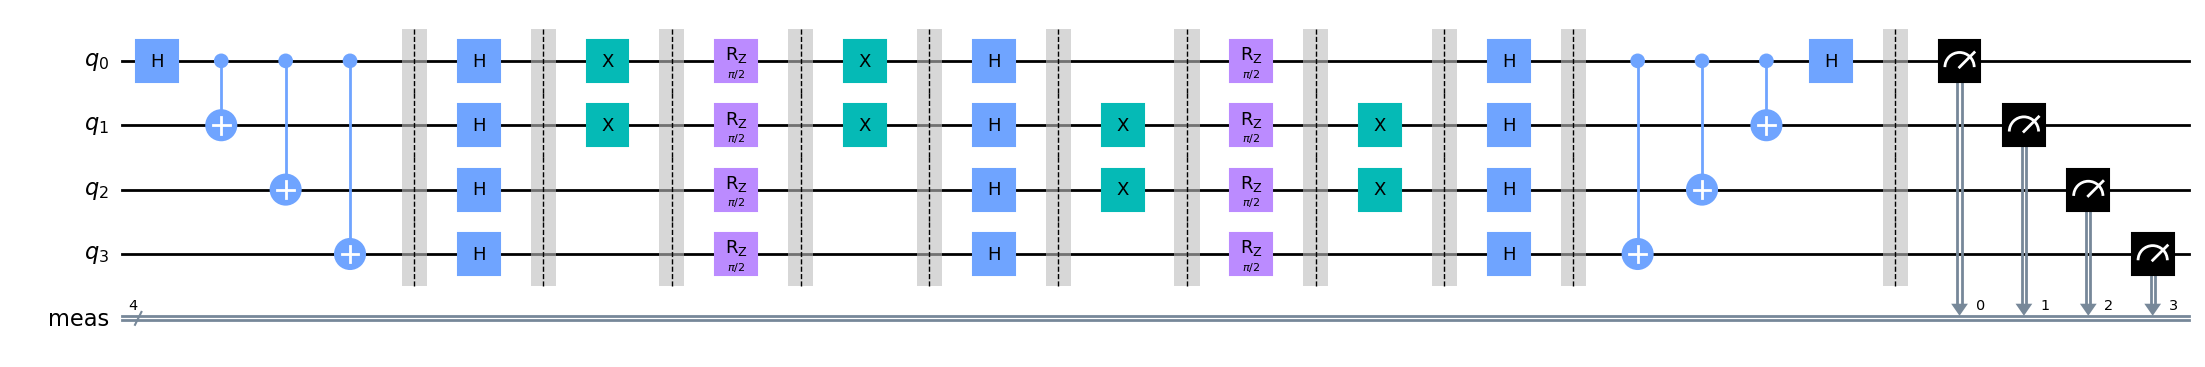

In [6]:
qc_1 = circ_gen.create_grover_enc_circuit('10')
qc_1.measure_all()
qc_1.draw(fold=-1, output='mpl', style='clifford')

Depth of transpiled circuit: 29


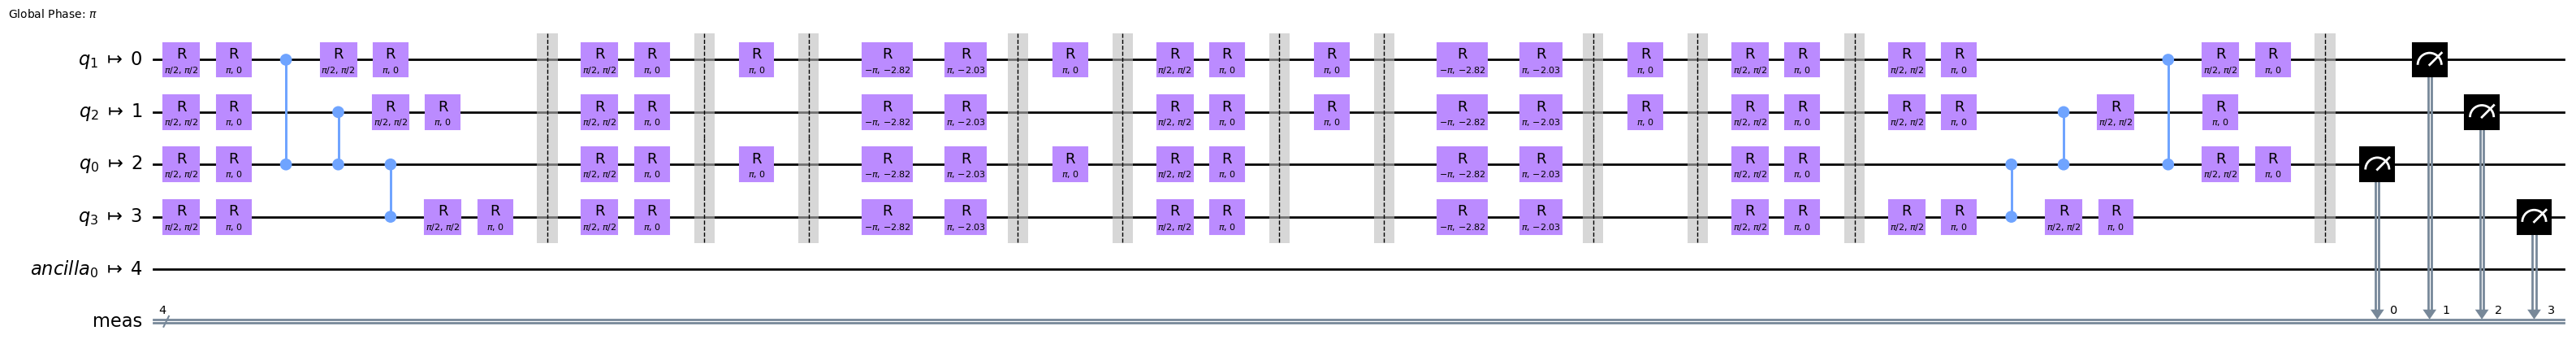

In [7]:
transpiled1 = utils.transpile_circuit(qc_1, backend_fake)
print("Depth of transpiled circuit:", transpiled1.depth())
transpiled1.draw(fold=-1, output='mpl', style='clifford')

# Version 2 

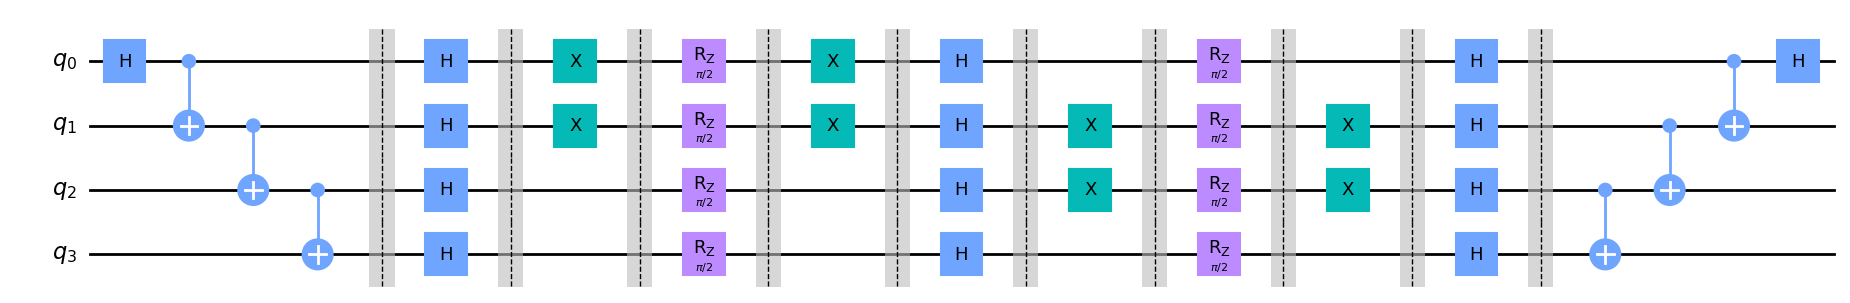

In [8]:
qc_2 = circ_gen.create_grover_enc_circuit('10', enc_ver=2)
qc_2.draw(fold=-1, output='mpl', style='clifford')

Depth of transpiled circuit: 54


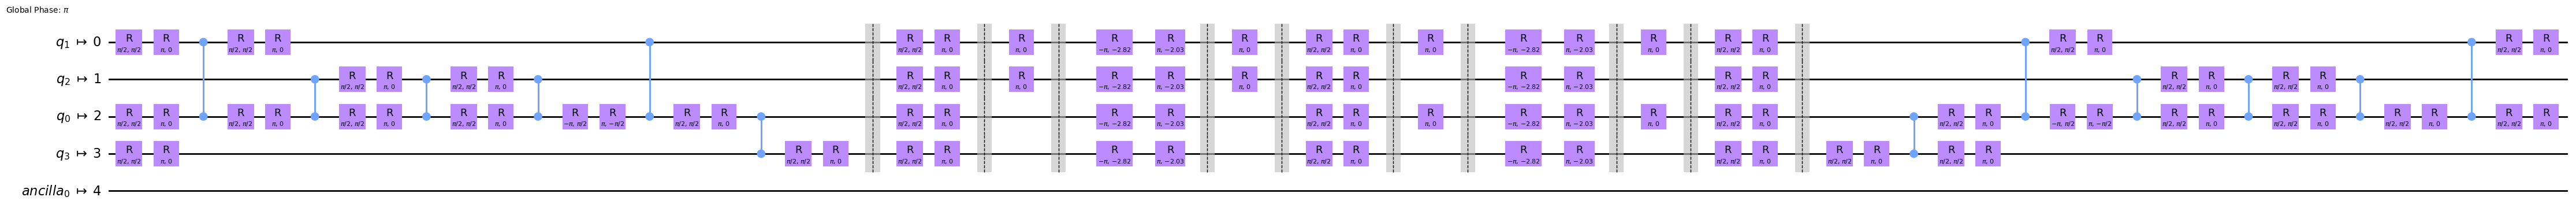

In [9]:
transpiled2 = utils.transpile_circuit(qc_2, backend_fake)
print("Depth of transpiled circuit:", transpiled2.depth())
transpiled2.draw(fold=-1, output='mpl', style='clifford')

# Compare the performance of these 2 versions

In [15]:
enc_dict1 = {'00': '0000', '01': '0011', '10': '0101', '11': '0110'}
acc_map1, plot_title1 = utils.run_and_get_accuracy_map(dict=enc_dict1, backend=backend, type='encoded', shots=shots)


In [ ]:
enc_dict2 = {'00': '0000', '01': '0010', '10': '0111', '11': '0101'}
acc_map2, plot_title2 = utils.run_and_get_accuracy_map(enc_dict2, backend, shots=shots, type='encoded_2')

In [ ]:
utils.plot_bargraph(acc_map1, "version 1", acc_map2, "version 2", "Encoded version 1 vs Encoded version 2 circuit on Helmi QPU")

In [ ]:
utils.plot_heatmap(acc_map1, plot_title1, acc_map2, plot_title2)

# Evaluate 

In [ ]:
accuracy1 = []
accuracy2 = []
epochs = 5

circ_1 = circ_gen.create_grover_enc_circuit('11')
circ_1.measure_all()

circ_2 = circ_gen.create_grover_enc_circuit('11', enc_ver=2)
circ_2.measure_all()

for i in range(epochs):
    count1, plot_title1 = utils.run_a_circuit(circ_1, backend, type="encoded", shots=shots)
    acc1 = count1.get(enc_dict1['11'], 0)/shots
    accuracy1.append(acc1)
    
    count2, plot_title2 = utils.run_a_circuit(circ_2, backend, type="encoded_2", shots=shots)
    acc2 = count2.get(enc_dict2['11'], 0)/shots
    accuracy2.append(acc2)
    
    print(f"Epoch {i}, version 1 accuracy: {acc1}, version 2 accuracy: {acc2}")


print("\nEvaluate the performance on Helmi")
print("Version 1 average accuracy: ", np.mean(accuracy1).round(2))
print("Version 2 average accuracy: ", np.mean(accuracy2).round(2))